# Descriptive Statistics Review

## Context

![img](./diamonds.jpg)


The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. 

In [490]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [491]:
#your code here
diamonds = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week4\Project_Week_4\diamonds.csv')

In [492]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [493]:
diamonds.shape

(53940, 11)

In [494]:
diamonds.drop(columns='Unnamed: 0', inplace=True)

In [495]:
#Now I see that everything is ok and I have 10 columns as described in the Table 
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [496]:
diamonds.shape

(53940, 10)

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [497]:
#your code here
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [498]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [499]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [500]:
#your code here
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [501]:
diamonds['color'].value_counts()


G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [502]:
diamonds['clarity'].value_counts()


SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [503]:
'''
According to the description in the Table I should have 7 numeric columns and 3 categorical columns, with the info function I see that this is true. 
Thanks to describe() function which summarizes numerical data I see that the values are in the range given in the Table above.
For categorical variables using value_counts() function I checked that they conatian only the right values i.e. cut has only 5 unique values, color has only 7 unique values and clarity has only 8 unique values
'''

'\nAccording to the description in the Table I should have 7 numeric columns and 3 categorical columns, with the info function I see that this is true. \nThanks to describe() function which summarizes numerical data I see that the values are in the range given in the Table above.\nFor categorical variables using value_counts() function I checked that they conatian only the right values i.e. cut has only 5 unique values, color has only 7 unique values and clarity has only 8 unique values\n'

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [504]:
#your code here
diamonds.shape

(53940, 10)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [505]:
#your code here
#First I create a dictionary which will transform the values into the scale 
clarity_scale ={
	'I1': 0, 
	'SI2': 1, 
	'SI1': 2, 
	'VS2': 3, 
	'VS1':4, 
	'VVS2':5, 
	'VVS1':6, 
	'IF':7	
}

#Now I can create a new column using the map function
diamonds['clarity_scale'] = diamonds['clarity'].map(clarity_scale)

In [506]:
#Now I check if it was successfull 
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


In [507]:
diamonds['clarity_scale'].value_counts()

2    13065
3    12258
1     9194
4     8171
5     5066
6     3655
7     1790
0      741
Name: clarity_scale, dtype: int64

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [508]:
#your code here
#I will proceed the same as with the clarity example
color_scale = {
	'J':0,
	'I':1,
	'H':2,
	'G':3,
	'F':4,
	'E':5,
	'D':6,
}

diamonds['color_scale']=diamonds['color'].map(color_scale)

In [509]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0


In [510]:
diamonds['color_scale'].value_counts()

3    11292
5     9797
4     9542
2     8304
6     6775
1     5422
0     2808
Name: color_scale, dtype: int64

With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [511]:
#your code here
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   cut            53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x              53940 non-null  float64
 8   y              53940 non-null  float64
 9   z              53940 non-null  float64
 10  clarity_scale  53940 non-null  int64  
 11  color_scale    53940 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 4.9+ MB


In [512]:
'''After comapring with the shape I can see that there are no missing values. The df should consist of 53940 rows and in each column I have the exact same number of non-null values'''

'After comapring with the shape I can see that there are no missing values. The df should consist of 53940 rows and in each column I have the exact same number of non-null values'

In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [513]:
#your code here
'''
For me every type of column is consistent with the data presented in it. I have now 9 columns which are numeric and 3 that are categorical. In fact I can drop 2 columns that I encoded above as they show the same informatio as encoded columns. 
The only column that might have incorrect type is price. Right now it is integer. I would assume that in areal life scenario prica will be more of a float, as price is usually given with the decimal points. However, diamonds are high standard commodities thus their price might be given as an integer
'''

'\nFor me every type of column is consistent with the data presented in it. I have now 9 columns which are numeric and 3 that are categorical. In fact I can drop 2 columns that I encoded above as they show the same informatio as encoded columns. \nThe only column that might have incorrect type is price. Right now it is integer. I would assume that in areal life scenario prica will be more of a float, as price is usually given with the decimal points. However, diamonds are high standard commodities thus their price might be given as an integer\n'

In [514]:
#now I will drop the 2 columns that were encoded not to repeat the information
cols_to_drop = ['clarity', 'color']

diamonds.drop(columns=cols_to_drop, inplace=True)

In [515]:
diamonds.head()

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,1,0


# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [516]:
#your code and comments here
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_scale,color_scale
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,3.051020,3.405803
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.647136,1.701105
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


In [517]:
'''
Now that I have 9 numeric columns I can see the description of the basic statistics for them. 
I see that all of the columns have the same number of values. 
I see the mean, std, min, max and 3 quartiles of each column. 
For carat column I see thta the q3 is far from the max value which might suggest existance of outliers. 
Depth is a percentage so should have values between 0 and 100. I see that the values of q1, q2 and q3 are very close, so there is a posibility of outliers there as well. Similar situation is for table column. 
Price column seems to be ok. 
The x colum  looks ok except the fact that the minimum value is equal to 0. For y and z 0 values also appear as well as I can see huge difference between q3 and max values again suggesting maybe the existance of outliers. 
Clarity scale and color scale columns are ok as I created them and they show respectivelly values from 0 to 6 and form 0 to 7.
'''

'\nNow that I have 9 numeric columns I can see the description of the basic statistics for them. \nI see that all of the columns have the same number of values. \nI see the mean, std, min, max and 3 quartiles of each column. \nFor carat column I see thta the q3 is far from the max value which might suggest existance of outliers. \nDepth is a percentage so should have values between 0 and 100. I see that the values of q1, q2 and q3 are very close, so there is a posibility of outliers there as well. Similar situation is for table column. \nPrice column seems to be ok. \nThe x colum  looks ok except the fact that the minimum value is equal to 0. For y and z 0 values also appear as well as I can see huge difference between q3 and max values again suggesting maybe the existance of outliers. \nClarity scale and color scale columns are ok as I created them and they show respectivelly values from 0 to 6 and form 0 to 7.\n'

You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [518]:
#your code here
diamonds.loc[diamonds['x'] == 0]

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
11182,1.07,Ideal,61.6,56.0,4954,0.0,6.62,0.0,1,4
11963,1.00,Very Good,63.3,53.0,5139,0.0,0.00,0.0,3,2
15951,1.14,Fair,57.5,67.0,6381,0.0,0.00,0.0,4,3
24520,1.56,Ideal,62.2,54.0,12800,0.0,0.00,0.0,3,3
26243,1.20,Premium,62.1,59.0,15686,0.0,0.00,0.0,6,6
27429,2.25,Premium,62.8,59.0,18034,0.0,0.00,0.0,1,2
49556,0.71,Good,64.1,60.0,2130,0.0,0.00,0.0,1,4
49557,0.71,Good,64.1,60.0,2130,0.0,0.00,0.0,1,4


In [519]:
diamonds.loc[diamonds['y'] == 0]

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
11963,1.00,Very Good,63.3,53.0,5139,0.0,0.0,0.0,3,2
15951,1.14,Fair,57.5,67.0,6381,0.0,0.0,0.0,4,3
24520,1.56,Ideal,62.2,54.0,12800,0.0,0.0,0.0,3,3
26243,1.20,Premium,62.1,59.0,15686,0.0,0.0,0.0,6,6
27429,2.25,Premium,62.8,59.0,18034,0.0,0.0,0.0,1,2
49556,0.71,Good,64.1,60.0,2130,0.0,0.0,0.0,1,4
49557,0.71,Good,64.1,60.0,2130,0.0,0.0,0.0,1,4


In [520]:
diamonds.loc[diamonds['z'] == 0]

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
2207,1.00,Premium,59.1,59.0,3142,6.55,6.48,0.0,1,3
2314,1.01,Premium,58.1,59.0,3167,6.66,6.60,0.0,0,2
4791,1.10,Premium,63.0,59.0,3696,6.50,6.47,0.0,1,3
5471,1.01,Premium,59.2,58.0,3837,6.50,6.47,0.0,1,4
10167,1.50,Good,64.0,61.0,4731,7.15,7.04,0.0,0,3
11182,1.07,Ideal,61.6,56.0,4954,0.00,6.62,0.0,1,4
11963,1.00,Very Good,63.3,53.0,5139,0.00,0.00,0.0,3,2
13601,1.15,Ideal,59.2,56.0,5564,6.88,6.83,0.0,3,3
15951,1.14,Fair,57.5,67.0,6381,0.00,0.00,0.0,4,3
24394,2.18,Premium,59.4,61.0,12631,8.49,8.45,0.0,1,2


In [521]:
len(diamonds.loc[diamonds['z'] == 0])

20

In [522]:
'''
I can see that in some of these cells the 0 values appear for all of the columns 
'''

'\nI can see that in some of these cells the 0 values appear for all of the columns \n'

In [523]:
diamonds.loc[(diamonds['x'] == 0) | (diamonds['y'] == 0) ]

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
11182,1.07,Ideal,61.6,56.0,4954,0.0,6.62,0.0,1,4
11963,1.00,Very Good,63.3,53.0,5139,0.0,0.00,0.0,3,2
15951,1.14,Fair,57.5,67.0,6381,0.0,0.00,0.0,4,3
24520,1.56,Ideal,62.2,54.0,12800,0.0,0.00,0.0,3,3
26243,1.20,Premium,62.1,59.0,15686,0.0,0.00,0.0,6,6
27429,2.25,Premium,62.8,59.0,18034,0.0,0.00,0.0,1,2
49556,0.71,Good,64.1,60.0,2130,0.0,0.00,0.0,1,4
49557,0.71,Good,64.1,60.0,2130,0.0,0.00,0.0,1,4


In [524]:
zero_dm = diamonds.loc[(diamonds['x'] == 0) & (diamonds['y'] == 0) & (diamonds['z'] == 0)]
zero_dm

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
11963,1.00,Very Good,63.3,53.0,5139,0.0,0.0,0.0,3,2
15951,1.14,Fair,57.5,67.0,6381,0.0,0.0,0.0,4,3
24520,1.56,Ideal,62.2,54.0,12800,0.0,0.0,0.0,3,3
26243,1.20,Premium,62.1,59.0,15686,0.0,0.0,0.0,6,6
27429,2.25,Premium,62.8,59.0,18034,0.0,0.0,0.0,1,2
49556,0.71,Good,64.1,60.0,2130,0.0,0.0,0.0,1,4
49557,0.71,Good,64.1,60.0,2130,0.0,0.0,0.0,1,4


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [525]:
#your code here
#the 12 rows metiond are given here, for them I can reclaculate z 
z_calc = diamonds.loc[(diamonds['x'] != 0) & (diamonds['y'] != 0) & (diamonds['z'] == 0)]

print(z_calc.shape)
z_calc

(12, 10)


,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
2207,1.00,Premium,59.1,59.0,3142,6.55,6.48,0.0,1,3
2314,1.01,Premium,58.1,59.0,3167,6.66,6.60,0.0,0,2
4791,1.10,Premium,63.0,59.0,3696,6.50,6.47,0.0,1,3
5471,1.01,Premium,59.2,58.0,3837,6.50,6.47,0.0,1,4
10167,1.50,Good,64.0,61.0,4731,7.15,7.04,0.0,0,3
13601,1.15,Ideal,59.2,56.0,5564,6.88,6.83,0.0,3,3
24394,2.18,Premium,59.4,61.0,12631,8.49,8.45,0.0,1,2
26123,2.25,Premium,61.3,58.0,15397,8.52,8.42,0.0,2,1
27112,2.20,Premium,61.2,59.0,17265,8.42,8.37,0.0,2,2
27503,2.02,Premium,62.7,53.0,18207,8.02,7.95,0.0,3,2


$Depth = \frac{2z}{x +y}  \Rightarrow   z =\frac{Depth \cdot (x+y)}{2}$


In [526]:
#I will use the fromula above
#I need to divide depth by 100

def calculate_z(x,y,depth):
	z= (depth/100)*(x+y)/2
	return z

#I will check it for the frist row at 2270
diamonds.loc[2270]

calculate_z(x=diamonds.at[2270, 'x'], y=diamonds.at[2270, 'y'], depth=diamonds.at[2270,'depth'])

3.4975799999999997

In [527]:
#It works for one row 
index=list(z_calc.index)

for num in index:
	z_calc.at[num,'z']=calculate_z(x=z_calc.at[num, 'x'], y=z_calc.at[num, 'y'], depth=z_calc.at[num,'depth'])

In [528]:
z_calc

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
2207,1.00,Premium,59.1,59.0,3142,6.55,6.48,3.850365,1,3
2314,1.01,Premium,58.1,59.0,3167,6.66,6.60,3.852030,0,2
4791,1.10,Premium,63.0,59.0,3696,6.50,6.47,4.085550,1,3
5471,1.01,Premium,59.2,58.0,3837,6.50,6.47,3.839120,1,4
10167,1.50,Good,64.0,61.0,4731,7.15,7.04,4.540800,0,3
13601,1.15,Ideal,59.2,56.0,5564,6.88,6.83,4.058160,3,3
24394,2.18,Premium,59.4,61.0,12631,8.49,8.45,5.031180,1,2
26123,2.25,Premium,61.3,58.0,15397,8.52,8.42,5.192110,2,1
27112,2.20,Premium,61.2,59.0,17265,8.42,8.37,5.137740,2,2
27503,2.02,Premium,62.7,53.0,18207,8.02,7.95,5.006595,3,2


**Apply it just to the rows with incorrect values**

In [529]:
#your code here
#Now I can do it in the diamonds df inorder to get rid of empty values
index=list(z_calc.index)

for num in index:
	diamonds.at[num,'z']=calculate_z(x=diamonds.at[num, 'x'], y=diamonds.at[num, 'y'], depth=diamonds.at[num,'depth'])

In [530]:
#Now I will check if that 12 rows still exists
z_calc = diamonds.loc[(diamonds['x'] != 0) & (diamonds['y'] != 0) & (diamonds['z'] == 0)]
z_calc

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale


In [531]:
#It is ok because I returned an empty dataframe 

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [532]:
diamonds.loc[diamonds['z'] == 0]

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
11182,1.07,Ideal,61.6,56.0,4954,0.0,6.62,0.0,1,4
11963,1.00,Very Good,63.3,53.0,5139,0.0,0.00,0.0,3,2
15951,1.14,Fair,57.5,67.0,6381,0.0,0.00,0.0,4,3
24520,1.56,Ideal,62.2,54.0,12800,0.0,0.00,0.0,3,3
26243,1.20,Premium,62.1,59.0,15686,0.0,0.00,0.0,6,6
27429,2.25,Premium,62.8,59.0,18034,0.0,0.00,0.0,1,2
49556,0.71,Good,64.1,60.0,2130,0.0,0.00,0.0,1,4
49557,0.71,Good,64.1,60.0,2130,0.0,0.00,0.0,1,4


In [533]:
#your code here
#I replace ) by NaN

diamonds['z'].replace(0,np.nan,inplace=True)


In [534]:
diamonds.isnull().sum()

carat            0
cut              0
depth            0
table            0
price            0
x                0
y                0
z                8
clarity_scale    0
color_scale      0
dtype: int64

In [535]:
#Now I will drop the NaN values
diamonds.dropna(inplace=True)



In [536]:
diamonds.isna().sum()

carat            0
cut              0
depth            0
table            0
price            0
x                0
y                0
z                0
clarity_scale    0
color_scale      0
dtype: int64

In [537]:
diamonds.shape

(53932, 10)

In [538]:
s=diamonds.loc[diamonds['z'] == np.NaN]

In [539]:
s

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale


----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [540]:
#your code here
def validate_z(x,y,z):
	depth = 2*z/(x+y)*100
	return depth


In [541]:
#I create the df with the rows for which I recalculated z, as I have thier indexes in the varibale index
depth_ver = diamonds.loc[index]
depth_ver

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
2207,1.00,Premium,59.1,59.0,3142,6.55,6.48,3.850365,1,3
2314,1.01,Premium,58.1,59.0,3167,6.66,6.60,3.852030,0,2
4791,1.10,Premium,63.0,59.0,3696,6.50,6.47,4.085550,1,3
5471,1.01,Premium,59.2,58.0,3837,6.50,6.47,3.839120,1,4
10167,1.50,Good,64.0,61.0,4731,7.15,7.04,4.540800,0,3
13601,1.15,Ideal,59.2,56.0,5564,6.88,6.83,4.058160,3,3
24394,2.18,Premium,59.4,61.0,12631,8.49,8.45,5.031180,1,2
26123,2.25,Premium,61.3,58.0,15397,8.52,8.42,5.192110,2,1
27112,2.20,Premium,61.2,59.0,17265,8.42,8.37,5.137740,2,2
27503,2.02,Premium,62.7,53.0,18207,8.02,7.95,5.006595,3,2


In [542]:
#Now I create a new column which will calculate new depth
depth_ver['new_depth']= validate_z(x=depth_ver['x'],y=depth_ver['y'],z=depth_ver['z'])

In [543]:
depth_ver[['depth', 'new_depth']]

,depth,new_depth
2207,59.1,59.1
2314,58.1,58.1
4791,63.0,63.0
5471,59.2,59.2
10167,64.0,64.0
13601,59.2,59.2
24394,59.4,59.4
26123,61.3,61.3
27112,61.2,61.2
27503,62.7,62.7


In [544]:
#In the table above I can see that all of the values were calculated correctly 

Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [545]:
#your code here
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_scale,color_scale
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540265,3.051101,3.405789
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667,1.647109,1.701165
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [559]:
#your code here
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_scale,color_scale
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540265,3.051101,3.405789
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667,1.647109,1.701165
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


In [547]:
#your comments here
'''
There are big diffrences between q3 and max value compared to the diffrence with other quantiles for columns carat, table, price and z which might suggest that they are outliers
'''

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [560]:
#your code here
diamonds[(diamonds['price'] > diamonds['price'].quantile(q=0.75))]

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
12765,1.07,Ideal,62.2,55.0,5325,6.54,6.58,4.08,1,5
12766,1.11,Ideal,60.6,59.0,5325,6.75,6.71,4.08,2,2
12767,1.14,Premium,62.2,58.0,5326,6.64,6.70,4.15,2,3
12768,1.07,Premium,62.1,59.0,5327,6.52,6.56,4.06,3,2
12769,1.33,Very Good,64.0,53.0,5327,6.93,7.01,4.46,2,0
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,62.8,57.0,18803,7.95,8.00,5.01,2,2
27746,2.07,Ideal,62.5,55.0,18804,8.20,8.13,5.11,1,3
27747,1.51,Ideal,61.7,55.0,18806,7.37,7.41,4.56,7,3
27748,2.00,Very Good,63.5,56.0,18818,7.90,7.97,5.04,2,3


In [ ]:
'''
There is 13481 values above the third quantile. Thus I guess it is possible that the price of dimonds (the rare ones) is that high. 
'''

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

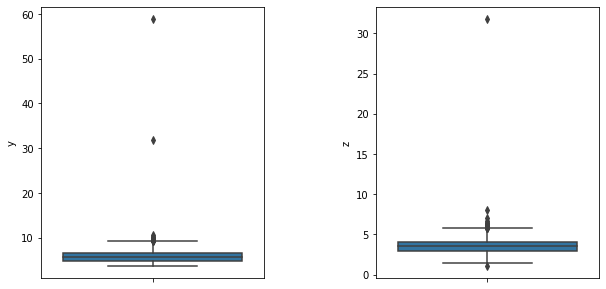

In [561]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [566]:
#your code here
diamonds[(diamonds.z > 10)]

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
48410,0.51,Very Good,61.8,54.7,1970,5.12,5.15,31.8,4,5


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [567]:
#your code here
diamonds.at[48410,'z']=0

In [568]:
diamonds.loc[48410]

carat                 0.51
cut              Very Good
depth                 61.8
table                 54.7
price                 1970
x                     5.12
y                     5.15
z                      0.0
clarity_scale            4
color_scale              5
Name: 48410, dtype: object

In [569]:
#Now I can recalculate z for that row 
diamonds.at[48410,'z']= calculate_z(x=diamonds.at[48410, 'x'], y=diamonds.at[48410, 'y'], depth=diamonds.at[48410,'depth'])

Let's check if we actually corrected the outlier.

In [570]:
diamonds.loc[48410]

carat                 0.51
cut              Very Good
depth                 61.8
table                 54.7
price                 1970
x                     5.12
y                     5.15
z                  3.17343
clarity_scale            4
color_scale              5
Name: 48410, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [572]:
#your code here
validate_z(x=diamonds.at[48410, 'x'],y=diamonds.at[48410, 'y'],z=diamonds.at[48410, 'z'])

61.8

In [ ]:
#the depth was sucessfully validated

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [573]:
#your code here
diamonds[(diamonds.y > 10)]

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
24067,2.00,Premium,58.9,57.0,12210,8.09,58.90,8.06,1,2
25998,4.01,Premium,61.0,61.0,15223,10.14,10.10,6.17,0,1
27415,5.01,Fair,65.5,59.0,18018,10.74,10.54,6.98,0,0
27630,4.50,Fair,65.8,58.0,18531,10.23,10.16,6.72,0,0
49189,0.51,Ideal,61.8,55.0,2075,5.15,31.80,5.12,4,5


We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [574]:
#your code here
def calculate_y(x,z, depth):
	y=(2*z/(depth/100))-x
	return y 


In [575]:
y_to_change = [24067,49189]
for num in y_to_change:
	diamonds.at[num,'y']=calculate_y(x=diamonds.at[num, 'x'], z=diamonds.at[num, 'z'], depth=diamonds.at[num,'depth'])


We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

In [576]:
diamonds.loc[y_to_change]

,carat,cut,depth,table,price,x,y,z,clarity_scale,color_scale
24067,2.00,Premium,58.9,57.0,12210,8.09,19.278421,8.06,1,2
49189,0.51,Ideal,61.8,55.0,2075,5.15,11.419579,5.12,4,5


In [ ]:
'''
the y values were corrected. The value at row 24067 is still pretty big so I will drop it 
'''

In [578]:
diamonds.drop(24067, inplace=True)

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

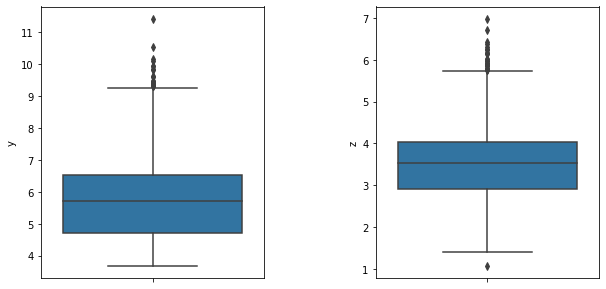

In [579]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [557]:
#your thoughts here
'''
The results are resonable and I am happy with them. The points/values that are outside the interquartile range are not far frokm it and their are not far from it so I will leave it like that. 
'''

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [580]:
#your code here
diamonds.to_csv(r'C:\Users\radek\IronHack\IronRadek\Week4\Project_Week_4\diamonds_clean.csv')